In [2]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
from subprocess import call
%matplotlib inline
plt.style.use('paper')

In [3]:
def write_png(params):
    i, t, dpi = params
    w1 = 2*np.pi
    e1 = 0.5
    fig, axarr = plt.subplots(figsize=(16,8), ncols=2)
    ax = axarr[0]
    ax.arrow(0, 0, 0.97*e1*np.cos(w1*t), 0.97*e1*np.sin(w1*t), head_width=0.02, linewidth=4, head_length=0.02, fc='r', ec='r', length_includes_head=True)
    circle = plt.Circle((0, 0), e1, color='k', fill=False, lw=3)
    ax.add_patch(circle)
    ax.set_aspect('equal')
    ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
    ax.set_yticks([-0.5, -0.25, 0, 0.25, 0.5])
    #ax.set_ylim([-0.22, 0.3])

    Nout = 1000
    rs = np.zeros(Nout)
    fs = np.linspace(0, 2*np.pi, Nout)
    for j, f in enumerate(fs):
        rs[j] = (1-e1**2)/(1+e1*np.cos(f))
    theta = w1*t
    rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    xyrot = np.dot(rot, np.array([rs*np.cos(fs), rs*np.sin(fs)]))
    axarr[1].plot(xyrot[0], xyrot[1], 'k', lw=3)
    axarr[1].scatter(0, 0, s=400, marker='*', facecolor='yellow', edgecolor='k', zorder=3)
    axarr[1].arrow(0, 0, 0.85*xyrot[0][0], 0.85*xyrot[1][0], head_width=0.03, linewidth=4, head_length=0.07, fc='r', ec='r', length_includes_head=True)
    axarr[1].set_aspect('equal')
    axarr[1].set_xlim([-1.6, 1.6])
    axarr[1].set_ylim([-1.6, 1.6])
    axarr[1].axis('off')
    fig.savefig('tmp/{0:0=5d}.png'.format(i), transparent=True, dpi=dpi, bbox_inches='tight')
    plt.close(fig)  

In [46]:
%%time
dpi = 300.3
Lmovie = 15 # sec
fps = 30
t=3
times = np.linspace(0, t, int(Lmovie*fps))

call("rm -f tmp/*.png", shell=True)
pool = rebound.InterruptiblePool()
params = [(i, time, dpi) for i, time in enumerate(times)]
res = pool.map(write_png, params)

CPU times: user 308 ms, sys: 203 ms, total: 511 ms
Wall time: 52.2 s


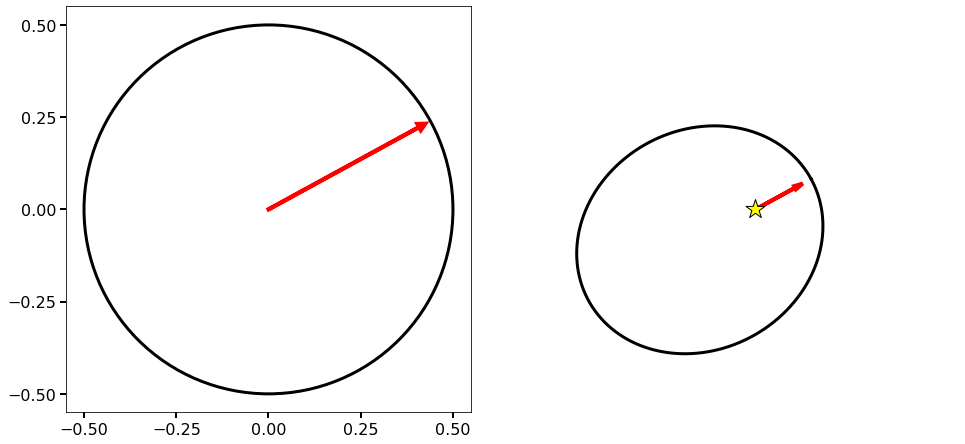

In [41]:
t = 5
w1 = 0.1
e1 = 0.5
fig, axarr = plt.subplots(figsize=(16,8), ncols=2)
ax = axarr[0]
ax.arrow(0, 0, 0.97*e1*np.cos(w1*t), 0.97*e1*np.sin(w1*t), head_width=0.02, linewidth=4, head_length=0.02, fc='r', ec='r', length_includes_head=True)
circle = plt.Circle((0, 0), e1, color='k', fill=False, lw=3)
ax.add_patch(circle)
ax.set_aspect('equal')
ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
ax.set_yticks([-0.5, -0.25, 0, 0.25, 0.5])
#ax.set_ylim([-0.22, 0.3])

Nout = 1000
rs = np.zeros(Nout)
fs = np.linspace(0, 2*np.pi, Nout)
for j, f in enumerate(fs):
    rs[j] = (1-e1**2)/(1+e1*np.cos(f))
theta = w1*t
rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
xyrot = np.dot(rot, np.array([rs*np.cos(fs), rs*np.sin(fs)]))
axarr[1].plot(xyrot[0], xyrot[1], 'k', lw=3)
axarr[1].scatter(0, 0, s=400, marker='*', facecolor='yellow', edgecolor='k', zorder=3)
axarr[1].arrow(0, 0, 0.85*xyrot[0][0], 0.85*xyrot[1][0], head_width=0.03, linewidth=4, head_length=0.07, fc='r', ec='r', length_includes_head=True)
axarr[1].set_aspect('equal')
axarr[1].set_xlim([-1.6, 1.6])
axarr[1].set_ylim([-1.6, 1.6])
axarr[1].axis('off')
fig.savefig('tmp/test.png'.format(i), transparent=True, dpi=dpi, bbox_inches='tight')   

In [4]:
def write_png(params):
    i, t, dpi = params
    w1 = 0.1
    e1 = 0.3

    w2 = 0.3
    e2 = 0.2

    w3 = 0.6
    e3 = 0.1

    s=0.87

    fig, axarr = plt.subplots(figsize=(16,8), ncols=2)
    ax = axarr[0]

    e2ctrx = e1*np.cos(w1*t)
    e2ctry = e1*np.sin(w1*t)

    ax.arrow(0, 0, s*e2ctrx, s*e2ctry, head_width=0.01, linewidth=4, head_length=0.02, fc='k', ec='k', length_includes_head=True)
    circle = plt.Circle((0, 0), e1, color='k', fill=False, lw=3)
    ax.add_patch(circle)

    e3ctrx = e1*np.cos(w1*t) + e2*np.cos(w2*t)
    e3ctry = e1*np.sin(w1*t) + e2*np.sin(w2*t)

    ax.arrow(e2ctrx, e2ctry, s*(e3ctrx-e2ctrx), s*(e3ctry-e2ctry), head_width=0.01, linewidth=4, head_length=0.02, fc='k', ec='k', length_includes_head=True)
    circle = plt.Circle((e2ctrx, e2ctry), e2, color='k', fill=False, lw=3)
    ax.add_patch(circle)

    e4ctrx = e1*np.cos(w1*t) + e2*np.cos(w2*t) + e3*np.cos(w3*t)
    e4ctry = e1*np.sin(w1*t) + e2*np.sin(w2*t) + e3*np.sin(w3*t)

    ax.arrow(e3ctrx, e3ctry, s*(e4ctrx-e3ctrx), s*(e4ctry-e3ctry), head_width=0.01, linewidth=4, head_length=0.02, fc='k', ec='k', length_includes_head=True)
    circle = plt.Circle((e3ctrx, e3ctry), e3, color='k', fill=False, lw=3)
    ax.add_patch(circle)

    ax.arrow(0, 0, s*e4ctrx, s*e4ctry, head_width=0.01, linewidth=4, head_length=0.02, fc='r', ec='r', length_includes_head=True)

    ax.set_aspect('equal')
    ax.set_xticks([-0.6, -0.3, 0, 0.3, 0.6])
    ax.set_yticks([-0.6, -0.3, 0, 0.3, 0.6])
    ax.set_xlim([-0.7, 0.7])
    ax.set_ylim([-0.7, 0.7])

    Nout = 1000
    rs = np.zeros(Nout)
    fs = np.linspace(0, 2*np.pi, Nout)
    e = np.sqrt((e4ctrx**2 + e4ctry**2))
    for j, f in enumerate(fs):
        rs[j] = (1-e1**2)/(1+e*np.cos(f))
    theta = np.arctan2(e4ctry, e4ctrx)
    rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    xyrot = np.dot(rot, np.array([rs*np.cos(fs), rs*np.sin(fs)]))
    axarr[1].plot(xyrot[0], xyrot[1], 'k', lw=3)
    axarr[1].scatter(0, 0, s=400, marker='*', facecolor='yellow', edgecolor='k', zorder=3)
    axarr[1].arrow(0, 0, s*xyrot[0][0], s*xyrot[1][0], head_width=0.01, linewidth=4, head_length=0.02, fc='r', ec='r', length_includes_head=True)
    axarr[1].set_aspect('equal')
    axarr[1].set_xlim([-3, 3])
    axarr[1].set_ylim([-3, 3])
    axarr[1].axis('off')
    fig.savefig('tmp/{0:0=5d}.png'.format(i), transparent=True, dpi=dpi, bbox_inches='tight')
    plt.close(fig)  

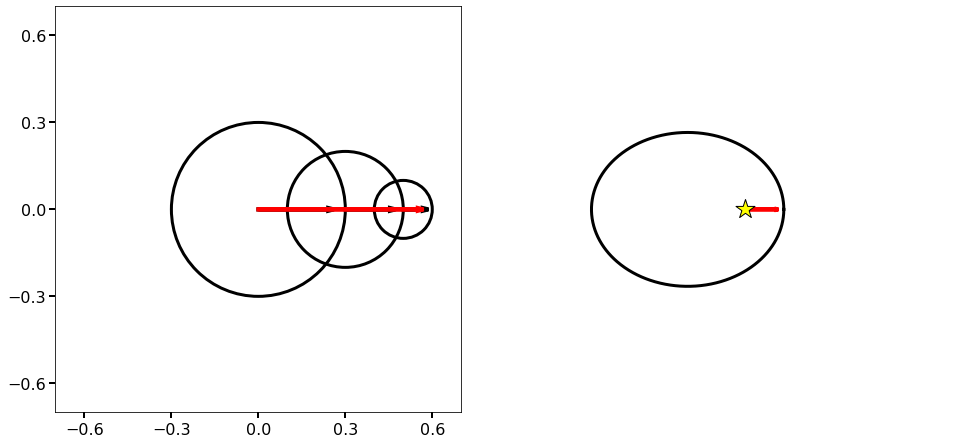

In [30]:
i, t, dpi = 0, 0, 300.4

w1 = 0.1
e1 = 0.3

w2 = 0.3
e2 = 0.2

w3 = 0.6
e3 = 0.1

s=0.87

fig, axarr = plt.subplots(figsize=(16,8), ncols=2)
ax = axarr[0]

e2ctrx = e1*np.cos(w1*t)
e2ctry = e1*np.sin(w1*t)

ax.arrow(0, 0, s*e2ctrx, s*e2ctry, head_width=0.01, linewidth=4, head_length=0.02, fc='k', ec='k', length_includes_head=True)
circle = plt.Circle((0, 0), e1, color='k', fill=False, lw=3)
ax.add_patch(circle)

e3ctrx = e1*np.cos(w1*t) + e2*np.cos(w2*t)
e3ctry = e1*np.sin(w1*t) + e2*np.sin(w2*t)

ax.arrow(e2ctrx, e2ctry, s*(e3ctrx-e2ctrx), s*(e3ctry-e2ctry), head_width=0.01, linewidth=4, head_length=0.02, fc='k', ec='k', length_includes_head=True)
circle = plt.Circle((e2ctrx, e2ctry), e2, color='k', fill=False, lw=3)
ax.add_patch(circle)

e4ctrx = e1*np.cos(w1*t) + e2*np.cos(w2*t) + e3*np.cos(w3*t)
e4ctry = e1*np.sin(w1*t) + e2*np.sin(w2*t) + e3*np.sin(w3*t)

ax.arrow(e3ctrx, e3ctry, s*(e4ctrx-e3ctrx), s*(e4ctry-e3ctry), head_width=0.01, linewidth=4, head_length=0.02, fc='k', ec='k', length_includes_head=True)
circle = plt.Circle((e3ctrx, e3ctry), e3, color='k', fill=False, lw=3)
ax.add_patch(circle)

ax.arrow(0, 0, 0.95*e4ctrx, 0.95*e4ctry, head_width=0.01, linewidth=4, head_length=0.02, fc='r', ec='r', length_includes_head=True)

ax.set_aspect('equal')
ax.set_xticks([-0.6, -0.3, 0, 0.3, 0.6])
ax.set_yticks([-0.6, -0.3, 0, 0.3, 0.6])
ax.set_xlim([-0.7, 0.7])
ax.set_ylim([-0.7, 0.7])

Nout = 1000
rs = np.zeros(Nout)
fs = np.linspace(0, 2*np.pi, Nout)
e = np.sqrt((e4ctrx**2 + e4ctry**2))
for j, f in enumerate(fs):
    rs[j] = (1-e1**2)/(1+e*np.cos(f))
theta = np.arctan2(e4ctry, e4ctrx)
rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
xyrot = np.dot(rot, np.array([rs*np.cos(fs), rs*np.sin(fs)]))
axarr[1].plot(xyrot[0], xyrot[1], 'k', lw=3)
axarr[1].scatter(0, 0, s=400, marker='*', facecolor='yellow', edgecolor='k', zorder=3)
axarr[1].arrow(0, 0, 0.85*xyrot[0][0], 0.85*xyrot[1][0], head_width=0.01, linewidth=4, head_length=0.02, fc='r', ec='r', length_includes_head=True)
axarr[1].set_aspect('equal')
axarr[1].set_xlim([-3, 3])
axarr[1].set_ylim([-3, 3])
axarr[1].axis('off')
fig.savefig('tmp/00000.png'.format(i), transparent=True, dpi=dpi, bbox_inches='tight')   

In [1]:
import matplotlib
matplotlib.__version__

'3.5.1'

In [5]:
%%time
dpi = 300.4
Lmovie = 90 # sec
fps = 30
t=360
times = np.linspace(0, t, int(Lmovie*fps))

call("rm -f tmp/*.png", shell=True)
pool = rebound.InterruptiblePool()
params = [(i, time, dpi) for i, time in enumerate(times)]
res = pool.map(write_png, params)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not

CPU times: user 250 ms, sys: 130 ms, total: 380 ms
Wall time: 4min 51s


In [74]:
e2ctrx, e2ctry, e3ctrx, e3ctry

(0.4387912809451864,
 0.2397127693021015,
 0.2709769751298959,
 0.1309085471242275)

In [69]:
e3ctrx, e1*np.cos(w1*t), e2*np.cos(w2*t)

(0.2709769751298959, 0.4387912809451864, -0.1678143058152905)

In [73]:
e3ctry,e1*np.sin(w1*t), e2*np.sin(w2*t)

(0.1309085471242275, 0.2397127693021015, -0.10880422217787399)

In [52]:
theta = 0.5
rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
xyrot = np.dot(rot, np.array([rs*np.cos(fs), rs*np.sin(fs)]))


xyrot[0]

array([ 9.31603656e-02,  9.26986869e-02,  9.22363453e-02,  9.17733378e-02,
        9.13096612e-02,  9.08453124e-02,  9.03802881e-02,  8.99145850e-02,
        8.94481996e-02,  8.89811285e-02,  8.85133681e-02,  8.80449147e-02,
        8.75757645e-02,  8.71059139e-02,  8.66353589e-02,  8.61640955e-02,
        8.56921198e-02,  8.52194276e-02,  8.47460148e-02,  8.42718771e-02,
        8.37970101e-02,  8.33214096e-02,  8.28450709e-02,  8.23679897e-02,
        8.18901612e-02,  8.14115808e-02,  8.09322438e-02,  8.04521452e-02,
        7.99712802e-02,  7.94896439e-02,  7.90072312e-02,  7.85240369e-02,
        7.80400559e-02,  7.75552830e-02,  7.70697127e-02,  7.65833398e-02,
        7.60961587e-02,  7.56081639e-02,  7.51193497e-02,  7.46297106e-02,
        7.41392408e-02,  7.36479344e-02,  7.31557855e-02,  7.26627882e-02,
        7.21689364e-02,  7.16742241e-02,  7.11786450e-02,  7.06821929e-02,
        7.01848616e-02,  6.96866445e-02,  6.91875352e-02,  6.86875272e-02,
        6.81866140e-02,  

In [48]:
np.array([rs*np.cos(fs), rs*np.sin(fs)]).shape

(2, 1000)